In [1]:
from Functions.class_Graph_TM import Graph_TM
from glob import glob

In [2]:
G = Graph_TM()
files = sorted(glob('Data/*.csv'))
file = files[0]
G.insert_cb(file)

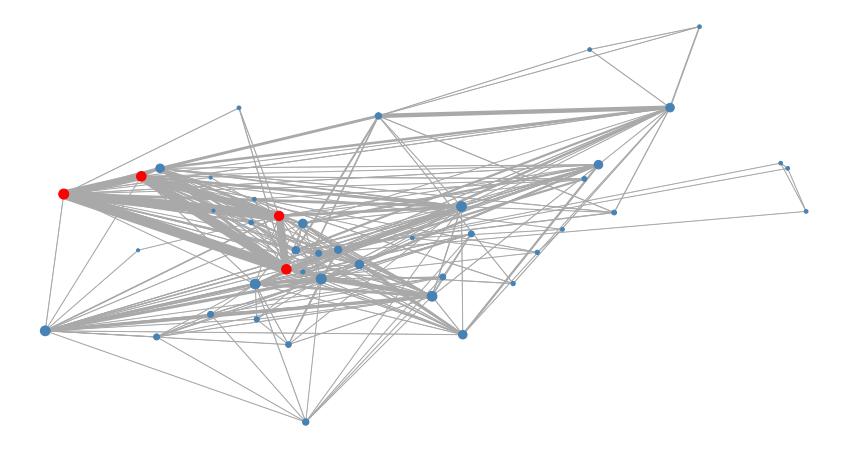

In [3]:
G.plot_network()

In [4]:
file = files[1]
G.insert_cb(file)

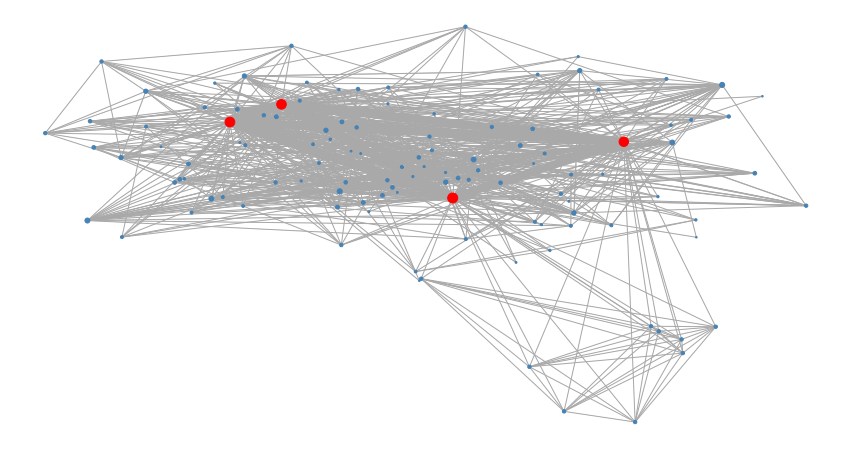

In [5]:
G.plot_network()

In [6]:
file = files[2]
G.insert_cb(file)

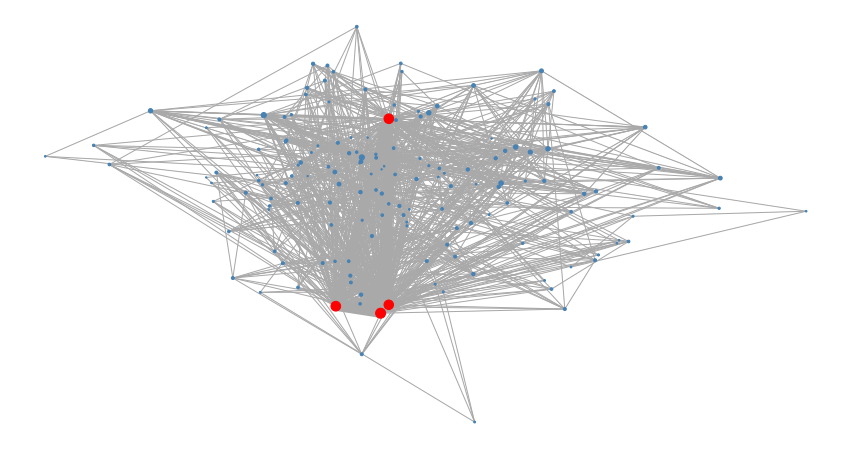

In [7]:
G.plot_network()

In [8]:
file = files[3]
G.insert_cb(file)

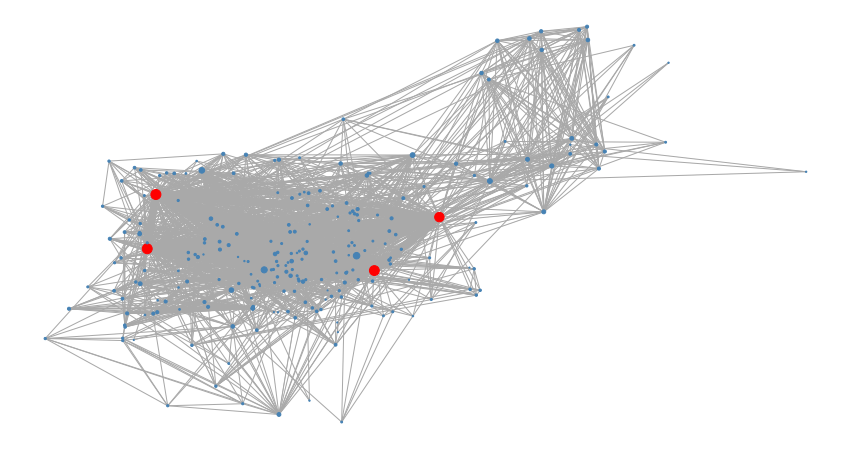

In [9]:
G.plot_network()

In [10]:
G.insert_cbs(files[4:])

Graph saved as ../TeX/img/all_comic_books_one_component.png


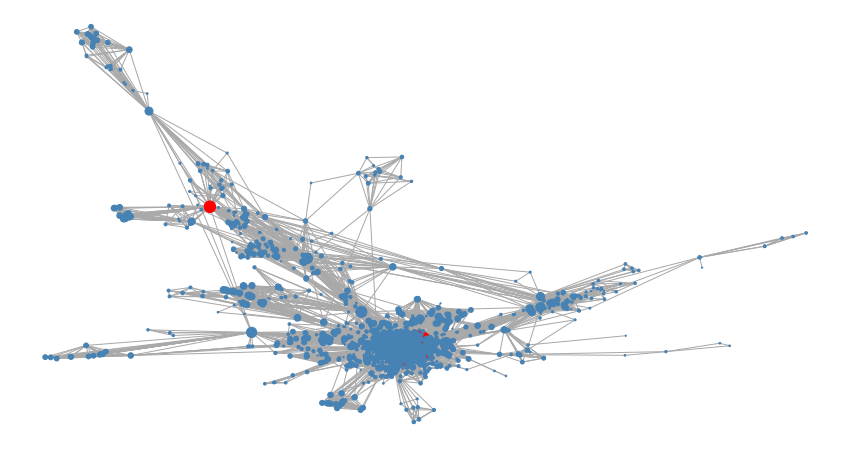

In [11]:
G.plot_network(filename = 'all_comic_books_one_component',
               max_node_size = 1000)

Graph saved as ../TeX/img/all_comic_books_all_components.png


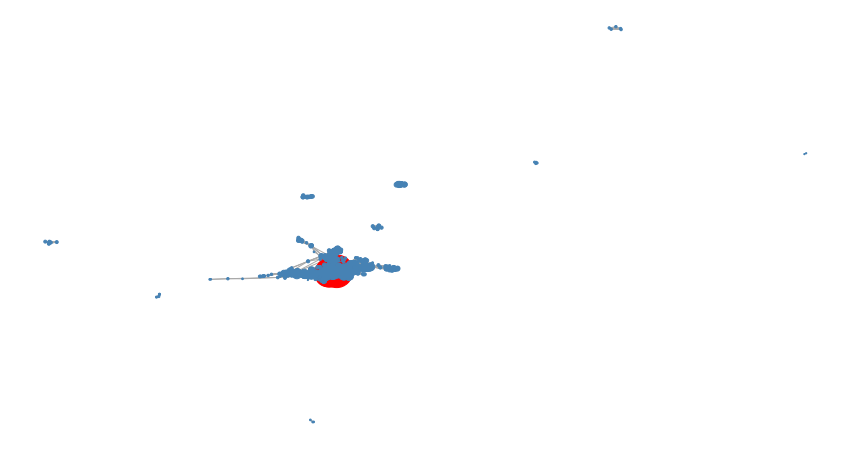

In [12]:
G.plot_network(filename = 'all_comic_books_all_components',
               max_node_size = 1000,
               max_connected_components = 'all')

In [13]:
import networkx as nx
print(nx.info(G.Graph))

Name: 
Type: Graph
Number of nodes: 1522
Number of edges: 10813
Average degree:  14.2089


In [14]:
# trabalhando só com a maior componente conexa
connected_components = list(nx.connected_components(G.Graph))
H = nx.subgraph(G.Graph, connected_components[0])
print(nx.info(H))

print(nx.average_shortest_path_length(H))

Name: 
Type: Graph
Number of nodes: 1462
Number of edges: 10557
Average degree:  14.4419
2.8254226861462315


In [15]:
from networkx.algorithms.distance_measures import *
from networkx.algorithms.shortest_paths.generic import *

d = diameter(H)
nodes = list(H.nodes())
paths = dict(shortest_path(H))
for i in range(len(nodes)):
    for j in range(i + 1, len(nodes)):
        u = nodes[i]
        v = nodes[j]
        if len(paths[u][v]) == (d + 1):
            sep = ' -> '
            print(f'Path from {u} to {v}:', sep.join(paths[u][v]), sep = '\n')
            print()

Path from Criança 14 - gibi 10 to Cafuné:
Criança 14 - gibi 10 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Cafuné

Path from Criança 14 - gibi 10 to Outro Índio:
Criança 14 - gibi 10 -> Homem 1 -> Dona Morte -> Mônica -> Astronauta -> Índio -> Papa-Capim -> Outro Índio

Path from Cafuné to Criança 12 - gibi 15:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> Criança 11 - gibi 15 -> Nico Demo -> Criança 12 - gibi 15

Path from Cafuné to Criança 14 - gibi 15:
Cafuné -> Papa-Capim -> Onça -> Borboleta -> Mônica -> Criança 11 - gibi 15 -> Nico Demo -> Criança 14 - gibi 15

Path from Outro Índio to Criança 12 - gibi 15:
Outro Índio -> Papa-Capim -> Onça -> Borboleta -> Mônica -> Criança 11 - gibi 15 -> Nico Demo -> Criança 12 - gibi 15

Path from Outro Índio to Criança 14 - gibi 15:
Outro Índio -> Papa-Capim -> Onça -> Borboleta -> Mônica -> Criança 11 - gibi 15 -> Nico Demo -> Criança 14 - gibi 15

